In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    filepath_or_buffer=dataset_path,
    index_col='PassengerId'
)

dataset_arr = df.to_numpy().astype(np.float64)
x, y = dataset_arr[:, :-1], dataset_arr[:, -1]

x_b = np.concatenate(
    (np.ones((x.shape[0], 1)), x),
    axis=1
)

In [9]:
val_size = 0.2
test_size = 0.125
random_state = 1
is_shuffle = True

x_train, x_val, y_train, y_val = train_test_split(
    x_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [10]:
normalizer = StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict(x, theta):
    dot_product = np.dot(x, theta)
    return sigmoid(dot_product)


def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (
        -y * \
        np.log(y_hat) - (1 - y) * \
        np.log(1 - y_hat)
    ).mean()
    
    
def compute_gradient(x, y, y_hat):
    return np.dot(x.T, (y_hat - y)) / y.shape[0]
    
    
def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta).round()
    return (y_hat == y).mean()

In [12]:
lr = 0.01
epochs = 200
batch_size = 16 # 16 is the mini_batch size

rng = np.random.default_rng(random_state)
theta = rng.uniform(size=x_train.shape[1])

train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accuracy = []
    val_batch_losses = []
    val_batch_accuracy = []    
    
    for i in range(0, x_train.shape[0], batch_size):
        x_i = x_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        y_hat = predict(x_i, theta)
        train_batch_losses.append(compute_loss(y_hat, y_i))
        gradient = compute_gradient(x_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_accuracy.append(compute_accuracy(x_train, y_train, theta))
        
        y_hat_val = predict(x_val, theta)
        val_batch_losses.append(compute_loss(y_hat_val, y_val))
        val_batch_accuracy.append(compute_accuracy(x_val, y_val, theta))
        
    train_losses.append(np.mean(train_batch_losses))
    train_accuracy.append(np.mean(train_batch_accuracy))
    val_losses.append(np.mean(val_batch_losses))
    val_accuracy.append(np.mean(val_batch_accuracy))
    print(f'\nEPOCH {epoch + 1}: \tTraining loss: {train_losses[-1]:.3f}\tValidation loss: {val_losses[-1]:.3f}')    


EPOCH 1: 	Training loss: 0.807	Validation loss: 0.859

EPOCH 2: 	Training loss: 0.774	Validation loss: 0.825

EPOCH 3: 	Training loss: 0.745	Validation loss: 0.794

EPOCH 4: 	Training loss: 0.719	Validation loss: 0.766

EPOCH 5: 	Training loss: 0.696	Validation loss: 0.741

EPOCH 6: 	Training loss: 0.676	Validation loss: 0.718

EPOCH 7: 	Training loss: 0.657	Validation loss: 0.698

EPOCH 8: 	Training loss: 0.640	Validation loss: 0.679

EPOCH 9: 	Training loss: 0.626	Validation loss: 0.663

EPOCH 10: 	Training loss: 0.612	Validation loss: 0.648

EPOCH 11: 	Training loss: 0.600	Validation loss: 0.635

EPOCH 12: 	Training loss: 0.589	Validation loss: 0.623

EPOCH 13: 	Training loss: 0.579	Validation loss: 0.612

EPOCH 14: 	Training loss: 0.570	Validation loss: 0.602

EPOCH 15: 	Training loss: 0.562	Validation loss: 0.594

EPOCH 16: 	Training loss: 0.555	Validation loss: 0.586

EPOCH 17: 	Training loss: 0.548	Validation loss: 0.579

EPOCH 18: 	Training loss: 0.542	Validation loss: 0.572



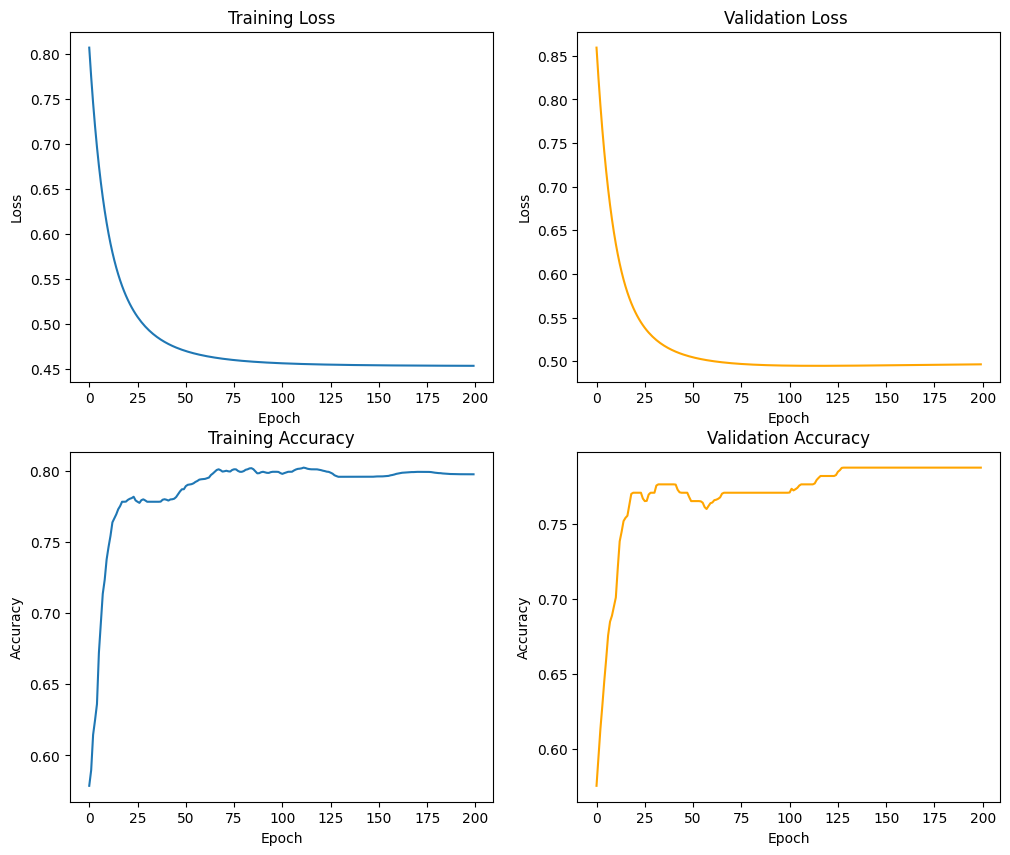

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch ', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss ')

ax[1, 0].plot(train_accuracy)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracy, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [14]:
val_set_acc = compute_accuracy(x_val, y_val, theta)
test_set_acc = compute_accuracy(x_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Evaluation accuracy: {val_set_acc}')
print(f'Validation accuracy: {test_set_acc}')

Evaluation on validation and test set:
Evaluation accuracy: 0.7877094972067039
Validation accuracy: 0.7342657342657343
